## Runnning with gammapy-dev/IRF_model


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets, FluxPointsDataset
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    PiecewiseNormSpectralModel,
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator
from gammapy.estimators import FluxPoints, FluxPointsEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
sys.path.append('../../../')
import Dataset_load 

from  Dataset_Setup import Setup, GaussianCovariance_matrix

In [2]:
config = Dataset_load.load_config()
colors = config['colors']['three']

colors
import ast

colors[1] = ast.literal_eval(colors[1])
colors[2] = ast.literal_eval(colors[2])
colors[3] = ast.literal_eval(colors[3])

## Read dataset

In [3]:
scaled_amplitude = Parameter("amplitude", value=1e-12)
lambda_ = Parameter("lambda_", value=1 / 60)

dataset_input = Dataset_load.create_asimov(
    model="ecpl", source="PKSflare", parameters=Parameters([scaled_amplitude, lambda_])
)

loaded dataset:
/home/katrin/Documents/nuisance_summary/PKS_flare/HESS_public/dataset-simulated-ecpl.fits.gz


In [4]:
norm = 0.0
tilt = 0.0
bias = 0.1
resolution = 0.0

In [5]:
setup = Setup(dataset_input=dataset_input)
#setup.set_up_irf_sys(bias, resolution, norm, tilt)
dataset_asimov, dataset_asimov_N = setup.run()
# irf model
setup.set_irf_model(dataset_asimov_N)
dataset_asimov_N.models.parameters['resolution'].frozen = True
dataset_asimov_N.irf_model.parameters['tilt'].frozen = True
dataset_asimov_N.irf_model.parameters['norm'].frozen = True
setup.set_irf_prior(dataset_asimov_N, bias, resolution, norm, tilt)

In [6]:
import json

def make_writeable(cc):
    d = dict()
    for ii, seg in enumerate(cc.allsegs[0]):
        d['x'] = seg[:,0].tolist()
        d['y'] = seg[:,1].tolist()
    return d

def save(c, name):
    d = make_writeable(c)
    with open(name, 'w') as f:
        json.dump(d, f)
        
def read(name):
    with open(name) as data_file:
        data_loaded = json.load(data_file)
    return data_loaded


asimov_model = Models.read("data/1_model.yml")
asimov_model_N = Models.read("data/1_model_N.yml")
def plot_best_fit(ax, par1, par2, factor1 =1 , factor2 =1):
    pp1, pp2 = asimov_model.parameters[par1], asimov_model.parameters[par2]
    ax.errorbar(pp1.value*factor1, pp2.value*factor2, xerr = pp1.error*factor1, yerr = pp2.error*factor2, 
                color = 'yellow',capsize = (4),  )
    ax.errorbar(pp1.value*factor1, pp2.value*factor2, xerr = pp1.error*factor1, yerr = pp2.error*factor2, 
                color = 'green',capsize = (4),  )
    pp1, pp2 = asimov_model_N.parameters[par1], asimov_model.parameters[par2]
    ax.errorbar(pp1.value*factor1, pp2.value*factor2, xerr = pp1.error*factor1, yerr = pp2.error*factor2, 
                color = 'blue', capsize = (4), linestyle = 'dashed')

## Standard 

In [7]:
datasets = Datasets([dataset_asimov])
datasets_N = Datasets([dataset_asimov_N])

In [8]:
%%time
fitting = 1
if fitting:
    fit = Fit(store_trace=False)
    result = fit.run(datasets)
    print(datasets.models)
print(result)

DatasetModels

Component 0: SkyModel

  Name                      : TQLL36So
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.07             
    amplitude                     :   1.00e-12   +/- 5.5e-14 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.017   +/-    0.01 1 / TeV     
    alpha                 (frozen):      1.000                   
    lon_0                         :    329.680   +/-    0.00 deg         
    lat_0                         :    -30.222   +/-    0.00 deg         

Component 1: FoVBackgroundModel

  Name                      : GH4InVxO-bkg
  Datasets names            : ['GH4InVxO']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :    

(array([2.16036983, 2.16319064, 2.16601145, 2.16883226, 2.17165308,
        2.17447389, 2.1772947 , 2.18011551, 2.18293632, 2.18575713,
        2.18857795, 2.19139876, 2.19421957, 2.19704038, 2.19986119,
        2.202682  , 2.20550281, 2.20832363, 2.21114444, 2.21396525,
        2.21678606, 2.21960687, 2.22242768, 2.22524849, 2.22806931,
        2.23089012, 2.23371093, 2.23653174, 2.23935255, 2.24217336,
        2.24499418, 2.24781499, 2.2506358 , 2.25345661, 2.25627742,
        2.25909823, 2.26191904, 2.26473986, 2.26756067, 2.27038148,
        2.27320229, 2.2760231 , 2.27884391, 2.28166473, 2.28448554,
        2.28730635, 2.29012716, 2.29294797, 2.29576878, 2.29858959,
        2.30141041, 2.30423122, 2.30705203, 2.30987284, 2.31269365,
        2.31551446, 2.31833527, 2.32115609, 2.3239769 , 2.32679771,
        2.32961852, 2.33243933, 2.33526014, 2.33808096, 2.34090177,
        2.34372258, 2.34654339, 2.3493642 , 2.35218501, 2.35500582,
        2.35782664, 2.36064745, 2.36346826, 2.36

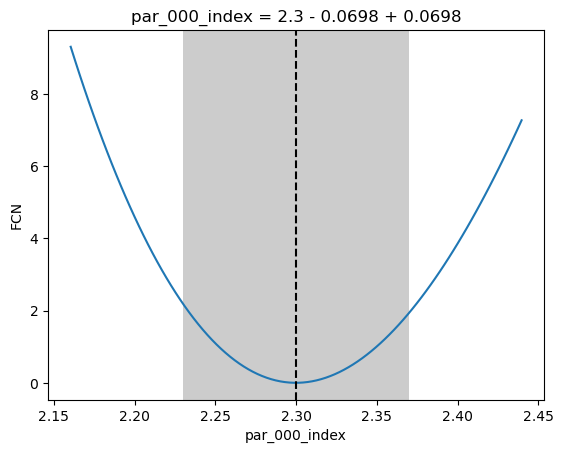

In [9]:
result.minuit.draw_profile("par_000_index")

(array([0.8907853 , 0.89299165, 0.89519801, 0.89740437, 0.89961073,
        0.90181708, 0.90402344, 0.9062298 , 0.90843616, 0.91064251,
        0.91284887, 0.91505523, 0.91726159, 0.91946795, 0.9216743 ,
        0.92388066, 0.92608702, 0.92829338, 0.93049973, 0.93270609,
        0.93491245, 0.93711881, 0.93932516, 0.94153152, 0.94373788,
        0.94594424, 0.94815059, 0.95035695, 0.95256331, 0.95476967,
        0.95697603, 0.95918238, 0.96138874, 0.9635951 , 0.96580146,
        0.96800781, 0.97021417, 0.97242053, 0.97462689, 0.97683324,
        0.9790396 , 0.98124596, 0.98345232, 0.98565868, 0.98786503,
        0.99007139, 0.99227775, 0.99448411, 0.99669046, 0.99889682,
        1.00110318, 1.00330954, 1.00551589, 1.00772225, 1.00992861,
        1.01213497, 1.01434132, 1.01654768, 1.01875404, 1.0209604 ,
        1.02316676, 1.02537311, 1.02757947, 1.02978583, 1.03199219,
        1.03419854, 1.0364049 , 1.03861126, 1.04081762, 1.04302397,
        1.04523033, 1.04743669, 1.04964305, 1.05

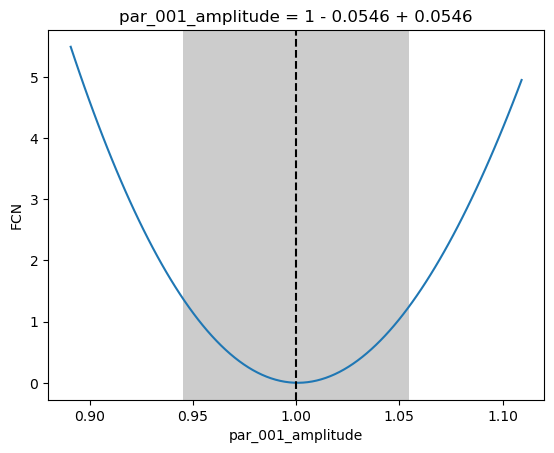

In [10]:
result.minuit.draw_profile("par_001_amplitude")

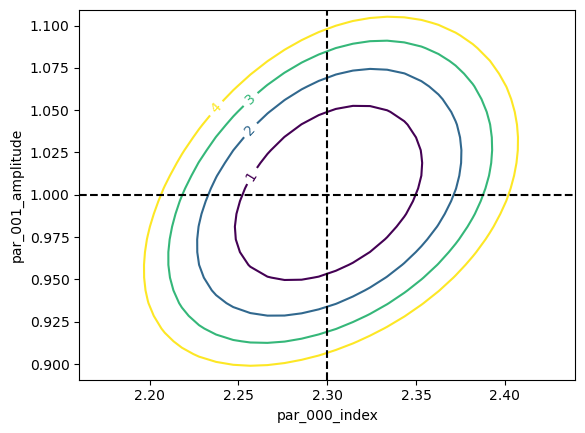

In [11]:
c = result.minuit.draw_contour("par_000_index", "par_001_amplitude", 
                               size = 30, 
                               )


CPU times: user 41.4 s, sys: 29.5 s, total: 1min 10s
Wall time: 1min 10s


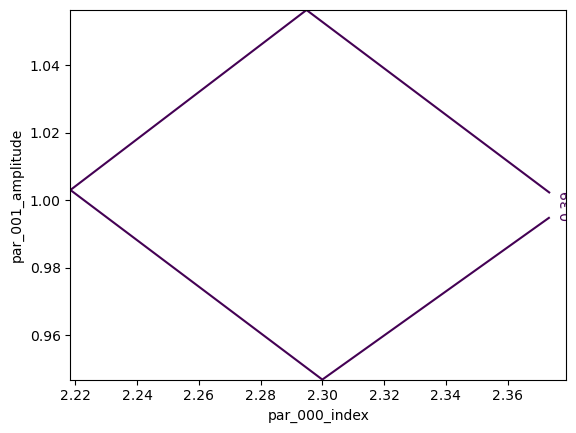

In [12]:
%%time
c = result.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                               cl = 0.39, 
                               size = 3, 
                               )


In [13]:
result.minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.502e+05                  │             Nfcn = 3188              │
│ EDM = 0.000342 (Goal: 0.0002)    │           time = 53.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name              │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_000_index     │   2.30    │   0.07    │   -0.07    │    0.07    │         │         │       │
│ 1 │ par_001_amplitude │   1.00    │   0.05    │   -0.05    │    0.05    │         │         │       │
│ 2 │ par_002_lambda_   │    1.7    │    1.4    │    -1.5    │    1.7     │         │         │       │
│ 3 │ par_003_lon_0     │ 3.296800  │ 0.000028  │ -0.000028  │  0.000028  │ 3.2868  │ 3.3068  │       │
│ 4 │ par_004_lat_0     │ -3.02217  │  0.00024  │  -0.00024  │  0.00024   │-3.12217 │-2.92217 │       │
│ 5 │ par_005_norm      │  1.0000   │  0.0016   │  -0.0016   │   0.0016   │         │         │       │
│ 6 │ par_006_tilt      │  0.0000   │  0.0017   │  -0.0017   │   0.0017   │         │         │       │
└───┴───────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │     par_000_index     │   par_001_amplitude   │    par_002_lambda_    │     par_003_lon_0     │     par_004_lat_0     │     par_005_norm      │     par_006_tilt      │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.07   │   0.07    │   -0.05   │   0.05    │   -1.5    │    1.7    │ -0.028e-3 │ 0.028e-3  │ -0.24e-3  │  0.24e-3  │  -0.0016  │  0.0016   │  -0.0017  │  0.0017   │
│  Valid   │   False   │   False   │   True    │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                   │     par_000_index par_001_amplitude   par_002_lambda_     par_003_lon_0     par_004_lat_0      par_005_norm      par_006_tilt │
├──────────────

## Nuisance Parameter

In [14]:
# fitting with frozen pos and bkg

In [15]:
#datasets_N.models[0].parameters['lon_0'].frozen = True
#datasets_N.models[0].parameters['lat_0'].frozen = True
#datasets_N.models[1].parameters['norm'].frozen = True
#datasets_N.models[1].parameters['tilt'].frozen = True

print(datasets_N.models)


DatasetModels

Component 0: SkyModel

  Name                      : TQLL36So
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.017   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   
    lon_0                 (frozen):    329.680       deg         
    lat_0                 (frozen):    -30.222       deg         

Component 1: FoVBackgroundModel

  Name                      : FuEbQGk3-bkg
  Datasets names            : ['FuEbQGk3']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                  (frozen):      1.000         

In [16]:
%%time
fitting = 1
if fitting:
    fit_N = Fit(store_trace=False)
    result_N = fit_N.run(datasets_N)
    print(datasets_N.models)
print(result_N)

DatasetModels

Component 0: SkyModel

  Name                      : TQLL36So
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.300   +/-    0.11             
    amplitude                     :   1.00e-12   +/- 5.5e-14 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.017   +/-    0.01 1 / TeV     
    alpha                 (frozen):      1.000                   
    lon_0                 (frozen):    329.680       deg         
    lat_0                 (frozen):    -30.222       deg         

Component 1: FoVBackgroundModel

  Name                      : FuEbQGk3-bkg
  Datasets names            : ['FuEbQGk3']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                  (frozen):      1.000         

(array([2.08430934, 2.08866673, 2.09302412, 2.09738151, 2.10173889,
        2.10609628, 2.11045367, 2.11481105, 2.11916844, 2.12352583,
        2.12788321, 2.1322406 , 2.13659799, 2.14095538, 2.14531276,
        2.14967015, 2.15402754, 2.15838492, 2.16274231, 2.1670997 ,
        2.17145708, 2.17581447, 2.18017186, 2.18452925, 2.18888663,
        2.19324402, 2.19760141, 2.20195879, 2.20631618, 2.21067357,
        2.21503095, 2.21938834, 2.22374573, 2.22810311, 2.2324605 ,
        2.23681789, 2.24117528, 2.24553266, 2.24989005, 2.25424744,
        2.25860482, 2.26296221, 2.2673196 , 2.27167698, 2.27603437,
        2.28039176, 2.28474915, 2.28910653, 2.29346392, 2.29782131,
        2.30217869, 2.30653608, 2.31089347, 2.31525085, 2.31960824,
        2.32396563, 2.32832302, 2.3326804 , 2.33703779, 2.34139518,
        2.34575256, 2.35010995, 2.35446734, 2.35882472, 2.36318211,
        2.3675395 , 2.37189689, 2.37625427, 2.38061166, 2.38496905,
        2.38932643, 2.39368382, 2.39804121, 2.40

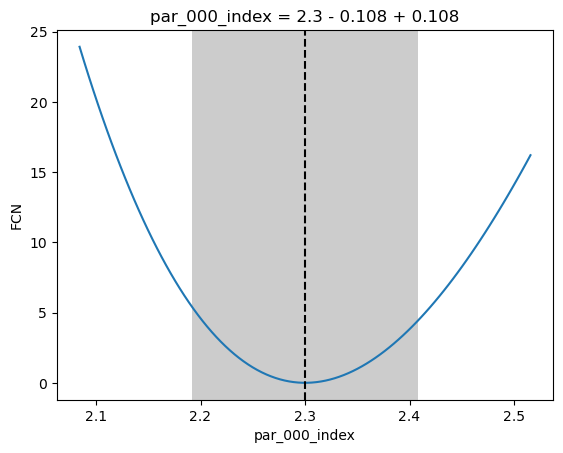

In [17]:
result_N.minuit.draw_profile("par_000_index")

In [28]:
%%time
# run migrad minimalisation first
result_N.minuit.migrad(iterate = 19, )

TypeError: migrad() got an unexpected keyword argument 'tol'

In [26]:
%%time
result_N.minuit.minos()

KeyboardInterrupt: 

In [22]:
result_N.minuit.draw_mnprofile("par_000_index")

/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/iminuit/minuit.py:1585: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.084309344885561
  warnings.warn(
/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/iminuit/minuit.py:1585: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.09918456247967
  warnings.warn(
/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/iminuit/minuit.py:1585: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.1140597800737786
  warnings.warn(
/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/iminuit/minuit.py:1585: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.1289349976678875
  warnings.warn(
/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/iminuit/minuit.py:1585: IMinuitWarning: MIGRAD fails to converge for par_000_index=2.1438102152619964
  warnings.warn(
/home/katrin/anaconda3/envs/gammapy-dev/lib/python3.9/site-packages/

KeyboardInterrupt: 

E MnContours unable to find first two points


ValueError: zero-size array to reduction operation minimum which has no identity

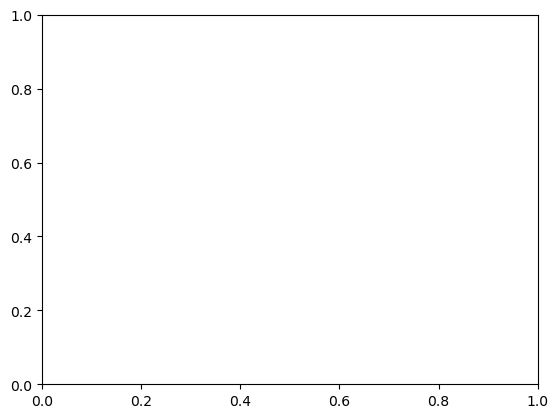

In [19]:
%%time
c_N = result_N.minuit.draw_mncontour("par_001_amplitude", "par_001_amplitude", 
                               cl = 0.39, 
                               size = 3, 
                               )


E MnContours unable to find first two points


ValueError: zero-size array to reduction operation minimum which has no identity

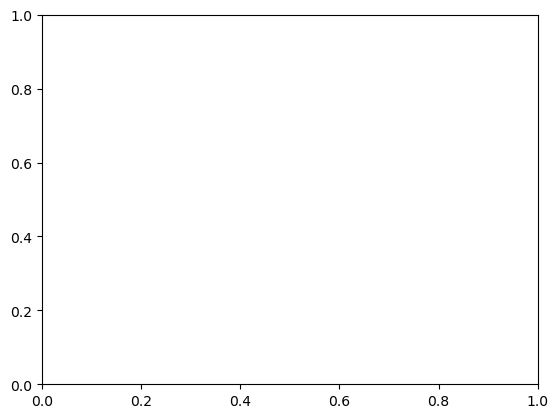

In [20]:
%%time
c_N = result_N.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                               cl = 0.39, 
                               size = 3, 
                               )


In [21]:
df

NameError: name 'df' is not defined

In [ ]:
%%time

fitting = 1
if fitting :
    c = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.39, 
                                   size = 30, 
                                   )
    save(c, 'data/5_scan_39_index_amplitude.json')
    print("computing 68")
    c = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.68, 
                                   size = 30, 
                                   )
    #save(c, 'data/5_scan_68_index_amplitude.json')
    print("computing 95")
    c95 = fit.minuit.draw_mncontour("par_000_index", "par_001_amplitude", 
                                   cl = 0.95, 
                                   size = 100, 
                                   )
    #save(c95, 'data/5_scan_95_index_amplitude.json')
else:
    c_39_a_i = read('data/5_scan_39_index_amplitude.json')
    c_a_i = read('data/5_scan_68_index_amplitude.json')
    c95_a_i = read('data/5_scan_95_index_amplitude.json')
    plt.plot(c_a_i['x'], np.array(c_a_i['y']), '--', label='Standard 39 %', color = 'red')
    plt.plot(c_a_i['x'], np.array(c_a_i['y']), '.-', label='Standard 68%', color = 'red')
    plt.plot(c95_a_i['x'], np.array(c95_a_i['y']), '.-', label='Standard 95', color = 'red')
    
    plot_best_fit(plt.gca(), "index", "amplitude", factor2 = 1e12)

In [ ]:
plot_best_fit(plt.gca(), "index", "amplitude", factor2 = 1e12)

In [ ]:
%%time
factor_lambda = 0.01

fitting = 0
if fitting :
    
    c = fit.minuit.draw_mncontour("par_000_index", "par_002_lambda_", 
                                   cl = 0.68, 
                                   size = 100, 
                                   )
    save(c, 'data/5_scan_68_index_lambda.json')
    print("computing 95")
    c95 = fit.minuit.draw_mncontour("par_000_index", "par_002_lambda_", 
                                   cl = 0.95, 
                                   size = 100, 
                                   )
    save(c95, 'data/5_scan_95_index_lambda.json')
else:
    c_i_l = read('data/5_scan_68_index_lambda.json')
    c95_i_l = read('data/5_scan_95_index_lambda.json')
    
    plt.plot(c_i_l['x'], np.array(c_i_l['y'])*factor_lambda, '.-', label='Standard 1$\sigma$', color = 'red')
    plt.plot(c95_i_l['x'], np.array(c95_i_l['y'])*factor_lambda, '.-', label='Standard 2$\sigma$', color = 'red')

In [ ]:
%%time

fitting = 0
if fitting :
    
    c = fit.minuit.draw_mncontour("par_002_lambda_", "par_001_amplitude", 
                                   cl = 0.68, 
                                   size = 100, 
                                   )
    save(c, 'data/5_scan_68_lambda_amplitude.json')
    print("computing 95")
    c95 = fit.minuit.draw_mncontour("par_002_lambda_", "par_001_amplitude", 
                                   cl = 0.95, 
                                   size = 100, 
                                   )
    save(c95, 'data/5_scan_95_lambda_amplitude.json')
else:
    c_l_a = read('data/5_scan_68_lambda_amplitude.json')
    c95_l_a = read('data/5_scan_95_lambda_amplitude.json')
    plt.plot(c_l_a['x'], np.array(c_l_a['y']), '.-', label='Standard 1$\sigma$', color = 'red')
    plt.plot(c95_l_a['x'], np.array(c95_l_a['y']), '.-', label='Standard 2$\sigma$', color = 'red')  

## Nuisance Parameters

In [ ]:
datasets_N.models[0].spatial_model.parameters.freeze_all()

In [ ]:
%%time
fitting= 1
if fitting: 
    minuit_opts = {"tol": 0.1, "strategy": 1}

    fit_N = Fit(store_trace=False)
    fit_N.optimize_opts = minuit_opts
    result_N = fit_N.run(datasets_N)
    print(result_N)
    print(datasets_N.models)

In [ ]:

size = (15,16,17)
#size = (2,3,4)


datasets_N.parameters["amplitude"].scan_n_sigma = 4
datasets_N.parameters["index"].scan_n_sigma = 4
datasets_N.parameters["lambda_"].scan_n_sigma = 4

datasets_N.parameters["amplitude"].scan_n_values = size[0]
datasets_N.parameters["index"].scan_n_values = size[1]
datasets_N.parameters["lambda_"].scan_n_values = size[2]

a_scan = datasets_N.parameters["amplitude"].scan_values.copy()
i_scan = datasets_N.parameters["index"].scan_values.copy()
l_scan = datasets_N.parameters["lambda_"].scan_values.copy()

scans = {"amplitude":a_scan,
        "index":i_scan,
        "lambda_":l_scan}

print(len(scans['amplitude']))
print(len(scans['index']))
print(len(scans['lambda_']))

In [ ]:
parnames = ['lambda_', 'index', 'amplitude']

In [ ]:
def compute_L(parname1, parname2, reopt = False, save = False):
    #datasets_N.parameters["amplitude"].scan_values = np.linspace(0.2e-12, 1.8e-12, 11 )
    #datasets_N.parameters["index"].scan_values = np.linspace(1.3, 3.3, 10 )
  
    
    par1 , par2 = datasets_N.parameters[parname1], datasets_N.parameters[parname2]
    scan_noopti = []
    for p in parnames:
        datasets_N.models.parameters[p].value = dataset_input.models.parameters[p].value  
        datasets_N.models.parameters[p].frozen = False  
        
    for a in scans[parname1]:
        scan_x = []
        for i in scans[parname2]:
            par1.value = a
            par2.value = i
            par1.frozen = True
            par2.frozen = True

            if reopt:
                result_N = fit_N.optimize(datasets_N)
                print(datasets_N.models)
                print(result_N)
                
            scan_x.append(datasets_N.stat_sum())
        scan_noopti.append(scan_x)
        
    if save: 
        with open(f"data/5a_2d_{parname1}_{parname2}.txt", "w") as f:
            np.savetxt(f, np.array(scan_noopti).flatten())

        with open(f"data/5a_{parname1}_{parname2[:1]}.txt", "w") as f:
            np.savetxt(f, scans[parname1])

        with open(f"data/5a_{parname2}_{parname1[:1]}.txt", "w") as f:
            np.savetxt(f, scans[parname2])

    return scan_noopti
  
  
def plot_imshow(scan, parname2, parname1):
    x_scan, y_scan = scans[parname1], scans[parname2] 
    fig = plt.figure()
    #im = plt.imshow(scan)
    im = plt.pcolormesh(x_scan, y_scan, scan)
    x_scan_ = x_scan.copy()
    y_scan_ = y_scan.copy()
    
    #if parname1 == "amplitude":
    #    x_scan_ = x_scan * 1e-12
    #if parname2 == "amplitude":
    #    y_scan_ = y_scan * 1e-12
    fig.colorbar(im)
    #plt.xticks(np.linspace(0,len(x_scan_)-1,len(x_scan_)), np.round(x_scan_,2));
    #plt.yticks(np.linspace(0,len(y_scan_)-1, len(y_scan_)), np.round(y_scan_,2));
    
    ax = plt.gca()
    ax.set_ylabel(parname2)
    ax.set_xlabel(parname1)  
    
    ax.plot(dataset_input.models.parameters[parname1].value,
           dataset_input.models.parameters[parname2].value,
           marker = '^', color = "white")
    
def read_L(parname1, parname2):
    print(f"{parname1}_{parname2}")
    scan =     np.loadtxt(f"data/5a_2d_{parname1}_{parname2}.txt")
    y0_scan =     np.loadtxt(f"data/5a_{parname1}_{parname2[:1]}.txt")
    x0_scan =     np.loadtxt(f"data/5a_{parname2}_{parname1[:1]}.txt")
    print("scan shape", np.shape(scan))
    print("scan x_scan", np.shape(x0_scan))
    print("scan y_scan", np.shape(y0_scan))
    
    scan = scan.reshape(len(y0_scan), len(x0_scan))
    print("scan shape", np.shape(scan))
    
    return scan, x0_scan, y0_scan



def compute_errors(Ls_new, x_new, y_new, threshold, find_min):
    offset = Ls_new.min() + threshold
    if offset > 0:
        inside = Ls_new * (Ls_new < offset)
    else:
        inside = Ls_new * (Ls_new >= offset)
    if find_min:  # find min:
        pos = np.where(inside > 0)
        ampli_best = x_new[np.where(Ls_new == Ls_new.min())[1][0]]
        index_best = y_new[np.where(Ls_new == Ls_new.min())[0][0]]

    else:  # find max
        pos = np.where(inside > 0)
        ampli_best = x_new[np.where(Ls_new == Ls_new.max())[1][0]]
        index_best = y_new[np.where(Ls_new == Ls_new.max())[0][0]]

    delta_bin = (x_new[1] - x_new[0]) / 2
    ampli_min = x_new[np.min(pos[1])] - delta_bin
    ampli_max = x_new[np.max(pos[1])] + delta_bin
    ampli_best += delta_bin

    delta_bin = (y_new[1] - y_new[0]) / 2
    index_min = y_new[np.min(pos[0])] - delta_bin
    index_max = y_new[np.max(pos[0])] + delta_bin
    index_best += delta_bin

    return index_min, index_max, ampli_min, ampli_max, index_best, ampli_best


def plot_L(
    Ls_new,
    x_new,
    y_new,
    threshold,
    find_min,
    color="red",
    ax=None,
    fig=None,
    cbar=True,
    cmap="viridis",
):
    index_min, index_max, ampli_min, ampli_max, index_best, ampli_best = compute_errors(
        Ls_new, x_new, y_new, threshold, find_min=find_min
    )
    if ax is None:
        fig, ax = plt.subplots(
            1,
            1,
        )

    im = ax.pcolormesh(x_new, y_new, Ls_new, cmap=cmap, rasterized=True)
    if cbar:
        fig.colorbar(im)

    CS = ax.contour(
        x_new, y_new, Ls_new, colors=(color,), levels=[Ls_new.min() + threshold]
    )
    # ax.clabel(CS, CS.levels, inline=True, fmt='$1\\sigma$', fontsize=12)

    plot_errors(
        ax,
        x_new,
        y_new,
        index_min,
        index_max,
        ampli_min,
        ampli_max,
        index_best,
        ampli_best,
        color,
    )

    ax.plot(ampli_best, index_best, "x", color=color)

    ax.set_ylabel(f"Amplitude [{a_unit}]")
    ax.set_xlabel("Index []")
    return CS

def plot_errors(
    ax,
    x_new,
    y_new,
    index_min,
    index_max,
    ampli_min,
    ampli_max,
    index_best,
    ampli_best,
    color,
):
    linewidth = 2

    ax.hlines(
        y=index_min,
        xmin=x_new[0],
        xmax=x_new[-1],
        color=color,
        linestyle="dotted",
        linewidth=linewidth,
    )
    ax.hlines(
        y=index_max,
        xmin=x_new[0],
        xmax=x_new[-1],
        color=color,
        linestyle="dotted",
        linewidth=linewidth,
    )

    ax.vlines(
        x=ampli_min,
        ymin=y_new[0],
        ymax=y_new[-1],
        color=color,
        linestyle="dotted",
        linewidth=linewidth,
    )
    ax.vlines(
        x=ampli_max,
        ymin=y_new[0],
        ymax=y_new[-1],
        color=color,
        linestyle="dotted",
        linewidth=linewidth,
    )



## No reopt

In [ ]:
scan_nopti = compute_L("amplitude", "index", False)
print(np.shape(scan_nopti))
plot_imshow(scan_nopti, "amplitude", "index")


factor_amplitude = 1e-12
plt.plot(c_a_i['x'], np.array(c_a_i['y'])*factor_amplitude, '.-', label='Standard 1$\sigma$', color = 'red')
plt.plot(c95_a_i['x'], np.array(c95_a_i['y'])*factor_amplitude, '.-', label='Standard 2$\sigma$', color = 'red')

In [ ]:
scan_nopti= compute_L("lambda_", "index",  False)
plot_imshow(scan_nopti,  "lambda_", "index")

plt.plot(c_i_l['x'], np.array(c_i_l['y'])*factor_lambda, '.-', label='Standard 1$\sigma$', color = 'red')
plt.plot(c95_i_l['x'], np.array(c95_i_l['y'])*factor_lambda, '.-', label='Standard 2$\sigma$', color = 'red')

In [ ]:
scan_nopti = compute_L("amplitude", "lambda_",  False)

plot_imshow(scan_nopti,  "amplitude", "lambda_")

factor_amplitude = 1e-12
plt.plot(np.array(c_l_a['x'])*factor_lambda,
         np.array(c_l_a['y'])*factor_amplitude, '.-', label='Standard 1$\sigma$', color = 'red')
plt.plot(np.array(c95_l_a['x'])*factor_lambda,
         np.array(c95_l_a['y'])*factor_amplitude, '.-', label='Standard 2$\sigma$', color = 'red')  

## Reopt



In [ ]:
computing = 0
if computing :
    scan = compute_L("amplitude", "index", reopt=1, save = True)
else:
    scan, z_scan, z_scan = read_L("amplitude", "index")
plot_imshow(scan, "amplitude", "index")

factor_amplitude = 1e-12
plt.plot(c_a_i['x'], np.array(c_a_i['y'])*factor_amplitude, '.-', label='Standard 1$\sigma$', color = 'red')
plt.plot(c95_a_i['x'], np.array(c95_a_i['y'])*factor_amplitude, '.-', label='Standard 2$\sigma$', color = 'red')

## Creating the contour

In [ ]:
y_scan = scans['amplitude']
x_scan = scans['index']

#source = list(contour.keys())[0][:-24]
amplix__ = y_scan.copy()
indexy__ = x_scan.copy()
N_new = 110
N_new_y = 100
amplix__new = np.linspace(amplix__[0], amplix__[-1], N_new)
indexy__new = np.linspace(indexy__[0], indexy__[-1], N_new_y)


f = interp2d(
    x=indexy__,
    y=amplix__,
    z=scan,
    kind="cubic",
    fill_value=None,
    bounds_error=False,
)
data_contour = f(indexy__new, amplix__new)

In [ ]:
fig, (ax1, ax) = plt.subplots(1, 2, figsize=(14, 5))

#im = ax1.pcolormesh(amplix__, indexy__, scan)
im = ax1.pcolormesh(indexy__, amplix__, scan)

dddd = np.array(scan)
ampli_best = amplix__[np.where(dddd == dddd.min())[0][0]]
index_best = indexy__[np.where(dddd == dddd.min())[1][0]]

ax1.plot(index_best, ampli_best, "x")
fig.colorbar(im, ax=ax1)
ax1.set_ylabel("amplitude")
ax1.set_xlabel(
    "index",
)
ax1.set_title("Likelihood")


im = ax.pcolormesh(indexy__new, amplix__new, data_contour)
dddd = np.array(data_contour)
ampli_best = amplix__new[np.where(dddd == dddd.min())[0][0]]
index_best = indexy__new[np.where(dddd == dddd.min())[1][0]]
print("min index:", index_best)
print("min amplitude:", ampli_best)

ax.plot(index_best, ampli_best, "x")
fig.colorbar(im, ax=ax)
ax.set_ylabel("amplitude")
ax.set_xlabel(
    "index",
)
ax.set_title("Likelihood")

In [ ]:
threshold_contour = 2

(
    ampli_min_asimov,
    ampli_max_asimov,
    index_min_asimov,
    index_max_asimov,
    ampli_best_asimov,
    index_best_asimov,
) = compute_errors(
    data_contour, indexy__new, amplix__new, threshold_contour, find_min=True
)
CS = plot_L(
    data_contour,
    indexy__new,
    amplix__new,
    threshold_contour,
    find_min=True,
    color="lightblue",
)

dat = CS.allsegs[0][0]

plot_best_fit(plt.gca(), "index", "amplitude")


factor_amplitude = 1e-12
plt.plot(c_a_i['x'], np.array(c_a_i['y'])*factor_amplitude, '.-', 
         
         label='Standard 1$\sigma$', color = 'gold')
plt.plot(c95_a_i['x'], np.array(c95_a_i['y'])*factor_amplitude, '.-', 
         label='Standard 2$\sigma$', color = 'gold')



## lambda, index 

In [ ]:
computing = 0
if computing :
    scan = compute_L("lambda_", "index", reopt= 1, save = True)
else:
    scan, z_scan, z_scan = read_L("lambda_", "index")
plot_imshow(scan, "lambda_", "index")

In [ ]:
y_scan = scans['lambda_']
x_scan = scans['index']

#source = list(contour.keys())[0][:-24]
amplix__ = y_scan.copy()
indexy__ = x_scan.copy()
N_new = 110
N_new_y = 100
amplix__new = np.linspace(amplix__[0], amplix__[-1], N_new)
indexy__new = np.linspace(indexy__[0], indexy__[-1], N_new_y)


f = interp2d(
    x=indexy__,
    y=amplix__,
    z=scan,
    kind="cubic",
    fill_value=None,
    bounds_error=False,
)
data_contour = f(indexy__new, amplix__new)

In [ ]:
fig, (ax1, ax) = plt.subplots(1, 2, figsize=(14, 5))

#im = ax1.pcolormesh(amplix__, indexy__, scan)
im = ax1.pcolormesh(indexy__, amplix__, scan)

dddd = np.array(scan)
ampli_best = amplix__[np.where(dddd == dddd.min())[0][0]]
index_best = indexy__[np.where(dddd == dddd.min())[1][0]]

ax1.plot(index_best, ampli_best, "x")
fig.colorbar(im, ax=ax1)
ax1.set_ylabel("amplitude")
ax1.set_xlabel(
    "index",
)
ax1.set_title("Likelihood")


im = ax.pcolormesh(indexy__new, amplix__new, data_contour)
dddd = np.array(data_contour)
ampli_best = amplix__new[np.where(dddd == dddd.min())[0][0]]
index_best = indexy__new[np.where(dddd == dddd.min())[1][0]]
print("min index:", index_best)
print("min amplitude:", ampli_best)

ax.plot(index_best, ampli_best, "x")
fig.colorbar(im, ax=ax)
ax.set_ylabel("amplitude")
ax.set_xlabel(
    "index",
)
ax.set_title("Likelihood")

In [ ]:
plot_best_fit(plt.gca(), "lambda_", "index")

In [ ]:
threshold_contour = 2

(
    ampli_min_asimov,
    ampli_max_asimov,
    index_min_asimov,
    index_max_asimov,
    ampli_best_asimov,
    index_best_asimov,
) = compute_errors(
    data_contour, indexy__new, amplix__new, threshold_contour, find_min=True
)
CS = plot_L(
    data_contour,
    indexy__new,
    amplix__new,
    threshold_contour,
    find_min=True,
    color="lightblue",
)

dat = CS.allsegs[0][0]

plot_best_fit(plt.gca(),"index", "lambda_", )


factor_amplitude = 1e-12
plt.plot(c_i_l['x'], np.array(c_i_l['y'])*factor_lambda, '.-', 
         label='Standard 1$\sigma$', color = 'gold')
plt.plot(c95_i_l['x'], np.array(c95_i_l['y'])*factor_lambda, '.-', 
             label='Standard 2$\sigma$', color = 'gold')




##  amplitude lambda

In [ ]:
computing = 0
if computing :
    scan = compute_L("amplitude", "lambda_", reopt= 1, save = True)
else:
    scan, z_scan, z_scan = read_L("amplitude", "lambda_")
plot_imshow(scan,  "amplitude", "lambda_")